# Ellipsoidal nested rejection sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data. For a tutorial on nested sampling, see: [INSERT LINK to NESTED SAMPLING TUTORIAL NOTEBOOK].

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

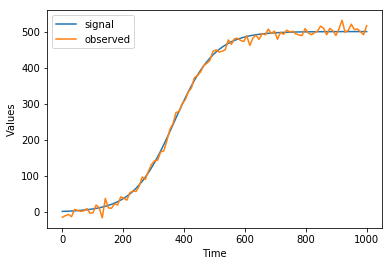

In [1]:
import os
os.chdir('C:/Users/bclamber/Desktop/AllPints/pints3/pints/')
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedEllipsoidSampler(log_likelihood, log_prior)

# Set number of iterations
sampler.set_iterations(4000)

# Set enlargement factor (a value of 1 means uniformly sample from the minimum volume 
# ellipsoid around sampled points, whereas > 1 widens the sampling volume)
sampler.set_enlargement_factor(1.25)

# Set number of initial rejection samples (before ellipsoidal sampling begins)
sampler.set_rejection_samples(200)

# Set the number of posterior samples to generate
sampler.set_posterior_samples(400)

# Set gaps between updating ellipsoid
sampler.set_ellipsoid_update_gap(100)

# Set the number of active points
sampler.set_active_points_rate(400)

Run the sampler!

In [3]:
samples, marginal_log_likelihood = sampler.run()
print('Done!')

Running nested rejection sampling
Number of active points: 400
Total number of iterations: 4000
Enlargement factor: 1.25
Total number of posterior samples: 400
Iter. Eval. Time m:s
0     1       0:00.0
0     2       0:00.0
0     3       0:00.0
0     4       0:00.0
0     5       0:00.0
0     21      0:00.0
0     41      0:00.0
0     61      0:00.0
0     81      0:00.0
0     101     0:00.0
0     121     0:00.0
0     141     0:00.0
0     161     0:00.0
0     181     0:00.0
0     201     0:00.0
0     221     0:00.0
0     241     0:00.0
0     261     0:00.0
0     281     0:00.0
0     301     0:00.0
0     321     0:00.0
0     341     0:00.0
0     361     0:00.0
0     381     0:00.0
400   401     0:00.0
420   421     0:00.0
440   441     0:00.0
460   461     0:00.0
480   483     0:00.0
500   509     0:00.0
520   535     0:00.0
540   561     0:00.1
560   588     0:00.1
580   616     0:00.1
[[  3.39579086e+04   3.34847950e-01  -5.01249576e+00]
 [  3.34847950e-01   5.85207385e-05   3.11436322e-0

KeyboardInterrupt: 

In [3]:
samples, marginal_log_likelihood = sampler.run()
print('Done!')

Running nested rejection sampling
Number of active points: 400
Total number of iterations: 4000
Enlargement factor: 1.25
Total number of posterior samples: 400
Iter. Eval. Time m:s
0     1       0:00.0
0     2       0:00.0
0     3       0:00.0
0     4       0:00.0
0     5       0:00.0
0     21      0:00.0
0     41      0:00.0
0     61      0:00.0
0     81      0:00.0
0     101     0:00.0
0     121     0:00.0
0     141     0:00.0
0     161     0:00.0
0     181     0:00.0
0     201     0:00.0
0     221     0:00.0
0     241     0:00.0
0     261     0:00.0
0     281     0:00.0
0     301     0:00.0
0     321     0:00.0
0     341     0:00.0
0     361     0:00.0
0     381     0:00.0
400   401     0:00.0
420   422     0:00.0
440   444     0:00.0
460   467     0:00.0
480   493     0:00.0
500   523     0:00.1
520   551     0:00.1
540   590     0:00.1
560   617     0:00.1
580   644     0:00.1
[[  2.76275301e+04   2.76843853e-01  -6.51504158e-01]
 [  2.76843853e-01   5.12461095e-05   1.18196667e-0

C:\Users\bclamber\Desktop\AllPints\pints3\pints\pints\_log_likelihoods.py:154: RuntimeWarning: invalid value encountered in log
  - np.sum(error**2, axis=0) / (2 * sigma**2))


1340  2356    0:00.5
1360  2386    0:00.5
1380  2418    0:00.5
[[  4.47760406e+04   7.10273566e-01  -2.76376872e+00]
 [  7.10273566e-01   6.34568549e-05  -1.18310943e-05]
 [ -2.76376872e+00  -1.18310943e-05   1.09562370e-03]]
[  1.55906265e-02   4.94946922e+02   2.15549945e+01]
[[  4.47760406e+04   7.10273566e-01  -2.76376872e+00]
 [  7.10273566e-01   6.34568549e-05  -1.18310943e-05]
 [ -2.76376872e+00  -1.18310943e-05   1.09562370e-03]]
[  1.55906265e-02   4.94946922e+02   2.15549945e+01]
1400  2453    0:00.5
1420  2494    0:00.5
1440  2534    0:00.5
1460  2566    0:00.5
1480  2601    0:00.6
[[  4.36534970e+04   8.10470380e-01  -2.84901900e+00]
 [  8.10470380e-01   6.66410670e-05  -2.25197805e-05]
 [ -2.84901900e+00  -2.25197805e-05   8.29317336e-04]]
[  1.57021046e-02   4.93731202e+02   2.42788795e+01]
1500  2642    0:00.6
1520  2674    0:00.6
1540  2705    0:00.6
1560  2738    0:00.6
1580  2775    0:00.6
[[  4.54565264e+04   6.99403502e-01  -2.66329977e+00]
 [  6.99403502e-01   7.17

3320  6425    0:01.6
3340  6466    0:01.6
3360  6507    0:01.6
3380  6541    0:01.6
[[  7.90583754e+05   9.16131987e+00   2.31746373e+00]
 [  9.16131987e+00   1.03198401e-03  -2.30279176e-05]
 [  2.31746373e+00  -2.30279176e-05   3.91479938e-03]]
[  1.49928961e-02   5.00476623e+02   1.97895553e+01]
[[  7.90583754e+05   9.16131987e+00   2.31746373e+00]
 [  9.16131987e+00   1.03198401e-03  -2.30279176e-05]
 [  2.31746373e+00  -2.30279176e-05   3.91479938e-03]]
[  1.49928961e-02   5.00476623e+02   1.97895553e+01]
3400  6570    0:01.6
3420  6605    0:01.6
3440  6639    0:01.6
3460  6688    0:01.6
3480  6737    0:01.6
[[  1.02191952e+06   1.21474276e+01  -1.64413583e+00]
 [  1.21474276e+01   1.33555233e-03  -1.03166597e-04]
 [ -1.64413583e+00  -1.03166597e-04   5.22501339e-03]]
[  1.49800664e-02   5.00043384e+02   1.89452023e+01]
3500  6778    0:01.6
3520  6808    0:01.7
3540  6842    0:01.7
3560  6878    0:01.7
3580  6915    0:01.7
[[  1.24281529e+06   1.73651744e+01  -1.56071521e+00]
 [  

C:\Users\bclamber\Desktop\AllPints\pints3\pints\pints\_nested\_ellipsoid.py:250: RuntimeWarning: invalid value encountered in less
  self._posterior_samples, p=vP)


In [5]:
samples

array([[  1.05796751e-02,   4.00271509e+02,   5.62811513e+00],
       [  1.05796751e-02,   4.00271509e+02,   5.62811513e+00],
       [  1.05796751e-02,   4.00271509e+02,   5.62811513e+00],
       ..., 
       [  1.05796751e-02,   4.00271509e+02,   5.62811513e+00],
       [  1.05796751e-02,   4.00271509e+02,   5.62811513e+00],
       [  1.05796751e-02,   4.00271509e+02,   5.62811513e+00]])

## Plot posterior samples versus true parameter values (dashed lines)

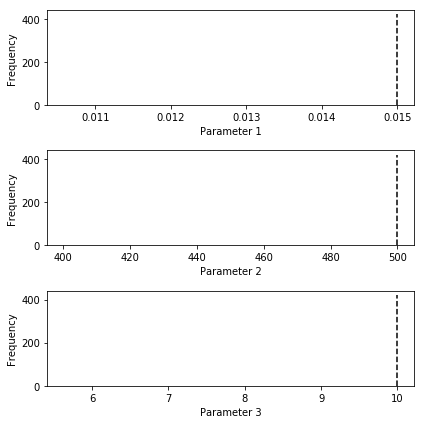

In [4]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

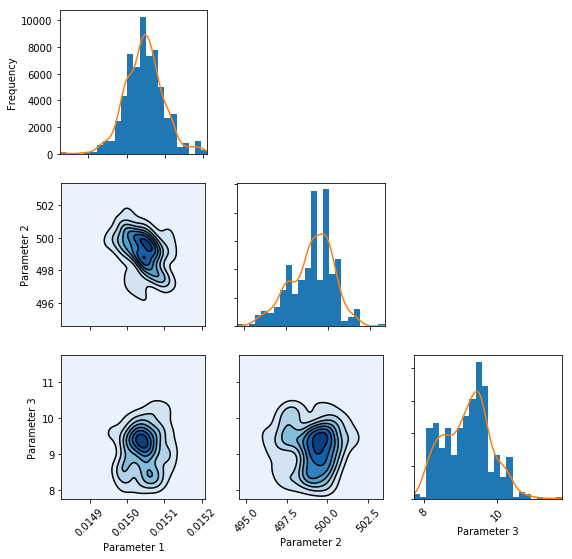

In [10]:
vTheta = samples[0]
pints.plot.pairwise(samples, kde=True)

plt.show()

## Plot posterior predictive simulations versus the observed data

In [ ]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [ ]:
print('marginal log-likelihood = ' + str(marginal_log_likelihood))